In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Questions to Investigate


### 4. User type 

**A) What is the percentage of Customer and subscriber?**
 
**B) Show the biking pattern of the Customer and subscriber during the various hours of the day.**

**C) Show the biking pattern of the Customer and subscriber in various days of the week.**

**D) Among the Customer and subscribers show the distribution of gender? **


In [2]:
%store -r df
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,day,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Sun,2017,12,16,15,1335.166667,Weekend,30,Winter,9.448761
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,Sun,2017,12,15,13,1313.333333,Weekend,52,Winter,30.711442
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,Sun,2017,12,14,2,726.716667,Weekend,20,Winter,6.377721


In [3]:
#Chekcing the number of rows and columns
df.shape

(1001173, 26)

In [4]:
# Data type information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001173 entries, 0 to 179105
Data columns (total 26 columns):
duration_sec               1001173 non-null int64
start_time                 1001173 non-null datetime64[ns]
end_time                   1001173 non-null datetime64[ns]
start_station_id           1001173 non-null int64
start_station_name         1001173 non-null object
start_station_latitude     1001173 non-null float64
start_station_longitude    1001173 non-null float64
end_station_id             1001173 non-null int64
end_station_name           1001173 non-null object
end_station_latitude       1001173 non-null float64
end_station_longitude      1001173 non-null float64
bike_id                    1001173 non-null int64
user_type                  1001173 non-null object
member_birth_year          1001173 non-null float64
member_gender              1001173 non-null object
month                      1001173 non-null object
day                        1001173 non-null object
year

### 3. Time : 

**A) Compare the average number and average duration of trips made on each weekday and weekend?**

**B) Show the percentage of joruney taken during diffrent time of day, day of the week, month and Season of the year?**

**C) Find the busiest day and the least busiest day of the year.**

**D) Show the riders duration distribution in minute.**

**Note: To simplify the analysis- it is convenient to drop some of the columns that we do not need to explore the time variable.**

In [5]:
# Drop 13 columns that are not currently needed
df_time = df.drop(['duration_sec','start_time','end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude','end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id','member_birth_year' ], axis=1)

In [6]:
# See the shape of the dataset- should return 13 columns 
df_time.shape

(1001173, 13)

In [7]:
#See the first 3 rows
df_time.head(3)

,user_type,member_gender,month,day,year,str_month_no,start_hour,end_hour,duration_min,day_type,age,season,distance
0,Customer,Male,Dec,Sun,2017,12,16,15,1335.166667,Weekend,30,Winter,9.448761
1,Customer,Female,Dec,Sun,2017,12,15,13,1313.333333,Weekend,52,Winter,30.711442
4,Subscriber,Female,Dec,Sun,2017,12,14,2,726.716667,Weekend,20,Winter,6.377721


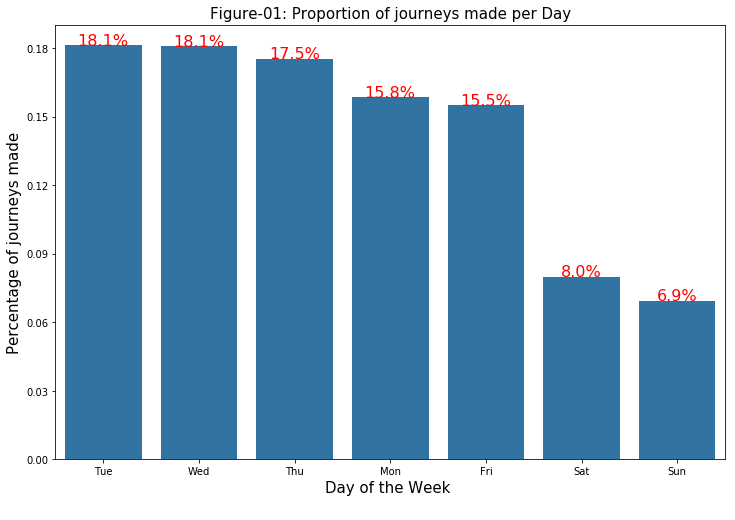

In [8]:
## Plot Proportion of journeys made per Day
plt.figure(figsize = [12, 8])
base_color = sns.color_palette()[1]
n_points = df_time['day'].value_counts().sum()
max_count = df_time['day'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.03)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_time['day'], color = base_color, order = df_time['day'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("Day of the Week \n ",fontsize=15)
plt.ylabel("Percentage of journeys made",fontsize=15)
plt.title('Figure-01: Proportion of journeys made per Day',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_time['day'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [17]:
avg_duration_per_day = df_time.groupby(['day'],as_index= False)['duration_min'].mean()
avg_duration_per_day 

,day,duration_min
0,Fri,12.324739
1,Mon,11.973838
2,Sat,16.361007
3,Sun,16.010844
4,Thu,11.878447
5,Tue,11.844706
6,Wed,11.794532


In [ ]:
sns.countplot(data = avg_duration_per_day , y = 'duration_min')

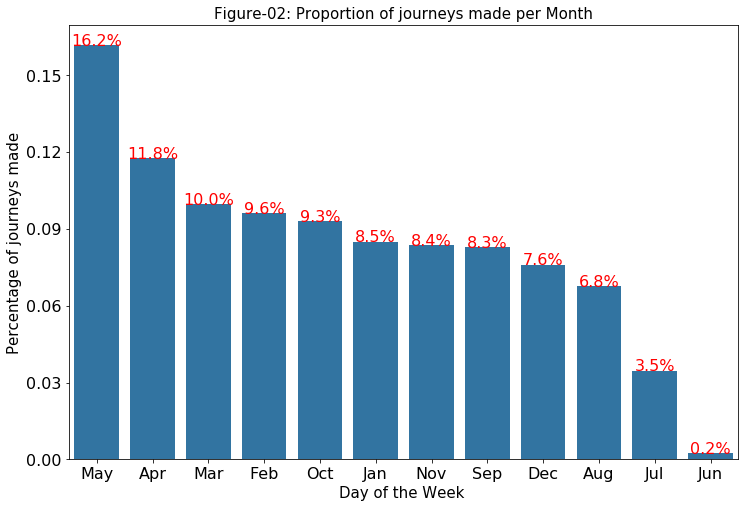

In [20]:
## Plot Proportion of journeys made per Day
plt.figure(figsize = [12, 8])
base_color = sns.color_palette()[1]
n_points = df_time['month'].value_counts().sum()
max_count = df_time['month'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.03)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_time['month'], color = base_color, order = df_time['month'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("Day of the Week \n ",fontsize=15)
plt.ylabel("Percentage of journeys made",fontsize=15)
plt.title('Figure-02: Proportion of journeys made per Month',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_time['month'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

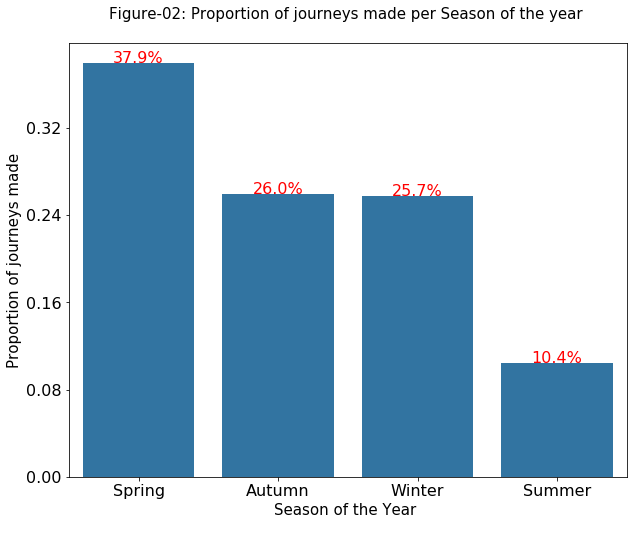

In [22]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [10, 8])
base_color = sns.color_palette()[1]
n_points = df_time['season'].value_counts().sum()
max_count = df_time['season'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_time, x = df_time['season'], color = base_color, order = df_time['season'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("Season of the Year \n",fontsize=15)
plt.ylabel("Proportion of journeys made",fontsize=15)
plt.title('Figure-02: Proportion of journeys made per Season of the year \n',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_time['season'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [26]:
#summer
df_weekday_summer = df.query('day_type == "Weekday" & season == "Summer"').groupby(['start_hour']).count().start_time.reset_index()
df_weekday_summer = df_weekday_summer.nlargest(24,'start_hour')

df_weekend_summer = df.query('day_type != "Weekday" & season == "Summer"').groupby(['start_hour']).count().start_time.reset_index()
df_weekend_summer = df_weekend_summer.nlargest(24,'start_hour')

#Autumn
df_weekday_autumn = df.query('day_type == "Weekday" & season == "Autumn"').groupby(['start_hour']).count().start_time.reset_index()
df_weekday_autumn = df_weekday_autumn.nlargest(24,'start_hour')

df_weekend_autumn = df.query('day_type != "Weekday" & season == "Autumn"').groupby(['start_hour']).count().start_time.reset_index()
df_weekend_autumn = df_weekend_autumn.nlargest(24,'start_hour')


#spring
df_weekday_spring = df.query('day_type == "Weekday" & season == "Spring"').groupby(['start_hour']).count().start_time.reset_index()
df_weekday_spring = df_weekday_spring.nlargest(24,'start_hour')

df_weekend_spring = df.query('day_type != "Weekday" & season == "Spring"').groupby(['start_hour']).count().start_time.reset_index()
df_weekend_spring = df_weekend_spring.nlargest(24,'start_hour')

#Winter
df_weekday_winter = df.query('day_type == "Weekday" & season == "Winter"').groupby(['start_hour']).count().start_time.reset_index()
df_weekday_winter = df_weekday_winter.nlargest(24,'start_hour')

df_weekend_winter = df.query('day_type != "Weekday" & season == "Winter"').groupby(['start_hour']).count().start_time.reset_index()
df_weekend_winter = df_weekend_autumn.nlargest(24,'start_hour')



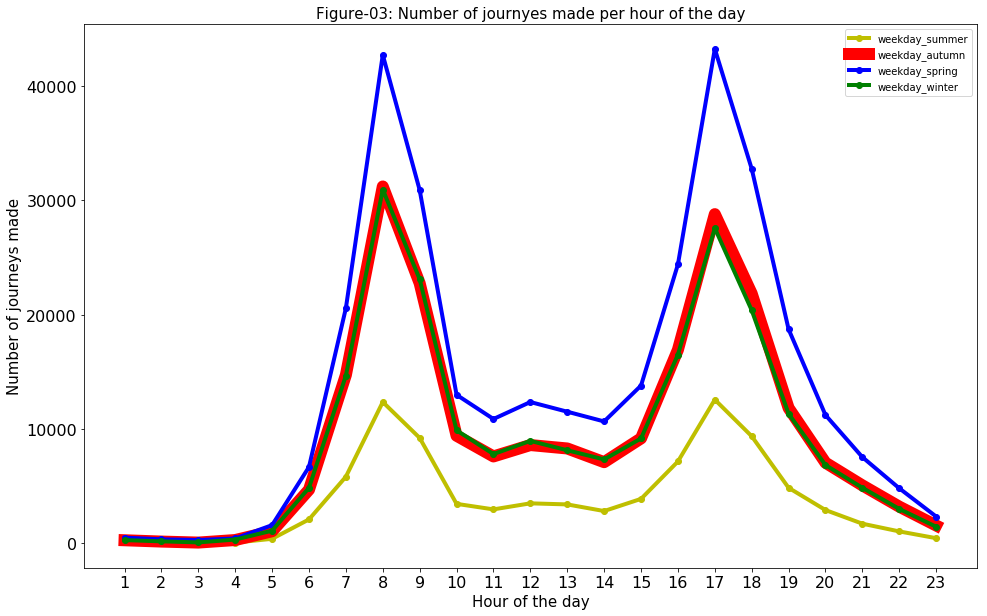

In [27]:
plt.figure(figsize = [16, 10])
sns.color_palette()
base_color = sns.color_palette()[0]
plt.ylabel("Number of journeys made",fontsize=15)
plt.xlabel("Hour of the day",fontsize=15)
plt.title('Figure-03: Number of journyes made per hour of the day',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

x_1=df_weekday_summer['start_hour']
y_1=df_weekday_summer['start_time']

x_3=df_weekday_autumn['start_hour']
y_3=df_weekday_autumn['start_time']


x_5=df_weekday_spring['start_hour']
y_5=df_weekday_spring['start_time']

x_7=df_weekday_winter['start_hour']
y_7=df_weekday_winter['start_time']

plt.plot(x_1, y_1, label='weekday_summer',linewidth=4.0,marker='o', linestyle='-', color='y')
plt.plot(x_3, y_3, label='weekday_autumn',linewidth=12.0,marker='o', linestyle='-', color='r')
plt.plot(x_5, y_5, label='weekday_spring',linewidth=4.0,marker='o', linestyle='-', color='b')
plt.plot(x_7, y_7, label='weekday_winter',linewidth=4.0,marker='o', linestyle='-', color='g')
plt.xticks(np.arange(min(x_1), max(x_1)+1, 1.0))
plt.legend()
plt.show()


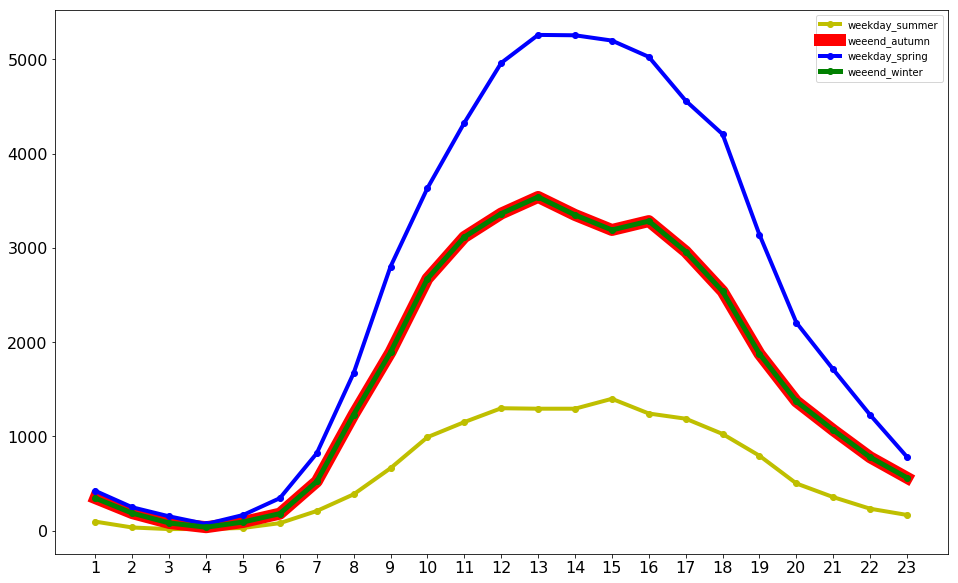

In [28]:
plt.figure(figsize = [16, 10])
sns.color_palette()
base_color = sns.color_palette()[0]

x_2 =df_weekend_summer['start_hour']
y_2 =df_weekend_summer['start_time']

x_4 =df_weekend_autumn['start_hour']
y_4 =df_weekend_autumn['start_time']


x_6 =df_weekend_spring['start_hour']
y_6 =df_weekend_spring['start_time']

x_8 =df_weekend_winter['start_hour']
y_8 =df_weekend_winter['start_time']

plt.plot(x_2, y_2, label='weekday_summer',linewidth=4.0,marker='o',linestyle='-', color='y')
plt.plot(x_4, y_4, label='weeend_autumn',linewidth=12.0,marker='o', linestyle='-', color='r')
plt.plot(x_6, y_6, label='weekday_spring',linewidth=4.0,marker='o', linestyle='-', color='b')
plt.plot(x_8, y_8, label='weeend_winter',linewidth=5.0,marker='o', linestyle='-', color='g')

plt.xticks(np.arange(min(x_2), max(x_2)+1, 1.0))


plt.legend()
plt.show()

**Note:**

**1. Most Journeys are made during the middle of the week Tuesday- Thursday and the least during the weekend.**

**2. Average Distance covered during the weekend is almost similar to the weekdays although the number journeys are much higher during the weekdays.**

**3. Average durations of the journyes during the weekend is higher than the journys during the weekdays.**


In [ ]:
df_gender_duration = df.groupby(['member_gender', 'day_type']).mean().duration_min.reset_index()
df_weekday_distance = df.groupby(['member_gender','day_type']).mean().distance.reset_index()
df_gender_journey = pd.merge(df_weekday_distance, df_gender_duration)
df_gender_journey

In [ ]:
ax = sns.barplot( data = df_gender_journey, x = 'member_gender', y = 'duration_min', hue = 'day_type')
ax.legend(loc = 3, ncol = 2, framealpha = 1, title = 'distance')


In [ ]:
ax = sns.barplot( data = df_gender_journey, x = 'member_gender', y = 'distance', hue = 'day_type')
ax.legend(loc = 3, ncol = 2, framealpha = 1, title = 'distance')

In [ ]:
df_season_duration = df.groupby(['season', 'day_type']).mean().duration_min.reset_index()
df_season_duration

3. User type

A) What is apercentage of user and subscriber?

B)Who travles more days on average: subscriber or customer

B) More distance and duration

C) Customer & Subscriber  per age group

D) Customer & Subscriber  per gender group

E) Pattern for Travel during the day


In [ ]:
# code for the pie chart seen above
## Plot the percentage of movie released per quarter
plt.figure(figsize = [10, 8])
base_color = sns.color_palette()[1]
n_points = df['user_type'].value_counts().sum()
max_count = df['user_type'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = df['user_type'], color = base_color, order = df['user_type'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("User Type \n",fontsize=15)
plt.ylabel("Proportion",fontsize=15)
plt.title('Figure-02: Proportion of Customer and Subscriber in the population \n',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [ ]:
df_sub = df.query('user_type == "Subscriber"')
df_cus = df.query('user_type == "Customer"')

In [ ]:
df_usertype_duration = df.groupby(['user_type', 'day_type']).mean().duration_min.reset_index()
df_usertype_distance = df.groupby(['user_type','day_type']).mean().distance.reset_index()
df_usertype_journey = pd.merge(df_usertype_duration, df_usertype_distance)
df_usertype_journey

In [ ]:
ax = sns.barplot( data = df_usertype_journey, x = 'user_type', y = 'duration_min', hue = 'day_type')
ax.legend(loc = 3, ncol = 2, framealpha = 1, title = 'duration_min')

In [ ]:
ax = sns.barplot( data = df_usertype_journey, x = 'user_type', y = 'distance', hue = 'day_type')
ax.legend(loc = 3, ncol = 2, framealpha = 1, title = 'distance_kilometer')

In [ ]:
df_sub['member_gender'].value_counts()

In [ ]:
fig, ax = plt.subplots(ncols = 1, figsize = [13,8])
ct_counts = df.groupby(['user_type', 'member_gender']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'member_gender', columns = 'user_type', values = 'count')
sns.heatmap(ct_counts,annot = True, fmt = 'd')

### Age

In [ ]:
#Finding the minimum and the maximum of age
df['age'].min(), df['age'].max() 

### Some of the ages are clearly wrong. Hence, we limit our analysis on the portion of the population with that falls  within the significant category.

In [ ]:
# median age of the population 
df['age'].median()

In [ ]:
df.describe().age

In [ ]:
plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
plt.subplot(1, 2, 1)
# left plot: violin plot
sns.violinplot(data = df, x = 'user_type', y = 'age', color = base_color)

plt.subplot(1, 2, 2)
# left plot: violin plot
sns.boxplot(data = df, x = 'user_type', y = 'age', color = base_color)

In [ ]:
# Calculaitng 99% percentile
ninetynine_percentile = np.percentile(df.age, 97)
ninetynine_percentile

**Note: We can see that 97% of the people are 59 years or younger. Hence, we exclude the population with age higher than 59 years from our analysis for convenience.**

In [ ]:
df_under61= df.query('age < 60')
df_under61.head(2)

In [ ]:
# Creates bin edges for runtime- this will exclude the 31 movies with 0 runtime as the bin edge starts at 0
bin_edges = [17, 19, 29, 39, 49, 60]
# Creates bin names based on the runtime
bin_names = ['Teenagers (18-19 yrs)','Twenties (20-29 yrs)','Thirties (30-39 yrs)', 'Forties (40-49 yrs)', 'Fifties (50-59 yrs)']

In [ ]:
# Creates decade_levels column based on the year of release
df_under61['age_cat'] = pd.cut(df_under61['age'], bin_edges, labels = bin_names)
df_under61.head()

In [ ]:
df_under61 = df_under61.drop(['bike_id','duration_sec','start_date', 'end_date','str_month_no','end_month_no', 'year','start_time','end_time', 'start_station_id', 'start_station_name', 'end_station_name', 'start_station_name','start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude','end_station_id','member_birth_year'], axis=1)

In [ ]:
df_under61.head()

In [ ]:
df_under61.query('age == 59').head(3)

In [ ]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[1]
n_points = df_under61['member_gender'].value_counts().sum()
max_count = df_under61['member_gender'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_under61, x = df_under61['member_gender'], color = base_color, order = df_under61['member_gender'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("Season of the Year \n",fontsize=15)
plt.ylabel("Proportion of journeys made",fontsize=15)
plt.title('Figure-02: Proportion of journeys made per Season of the year \n',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_under61['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [ ]:
df_under61_male = df_under61.query('member_gender == "Male"')
df_under61_female = df_under61.query('member_gender == "Feale"')

In [ ]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[1]
n_points = df_under61_male['age_cat'].value_counts().sum()
max_count = df_under61_male['age_cat'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_under61, x = df_under61['age_cat'], color = base_color, order = df_under61_male['age_cat'].value_counts().index)
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("Season of the Year \n",fontsize=15)
plt.ylabel("Proportion of journeys made",fontsize=15)
plt.title('Figure-02: Proportion of journeys made per Season of the year \n',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_under61_male['age_cat'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [ ]:
## Plot the percentage of movie released per quarter
plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[1]
n_points = df_under61['age_cat'].value_counts().sum()
max_count = df_under61['age_cat'].value_counts().max()
max_prop = max_count/ n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.08)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sns.color_palette()[0]
sns.countplot(data = df_under61, x = df_under61['age_cat'], color = base_color, order = df_under61['age_cat'].value_counts().index )
plt.yticks(tick_props * n_points, tick_names)
plt.xlabel("Season of the Year \n",fontsize=15)
plt.ylabel("Proportion of journeys made",fontsize=15)
plt.title('Figure-02: Proportion of journeys made per Season of the year \n',fontsize=15)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# add annotations
cat_counts = df_under61['age_cat'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count+1, pct_string, ha = 'center', color = 'R', fontsize=16)

In [ ]:
df_under61['member_gender'].value_counts()

In [ ]:
fig, ax = plt.subplots(ncols = 1, figsize = [13,8])
ct_counts = df_under61.groupby(['user_type', 'age_cat']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'age_cat', columns = 'user_type', values = 'count')
sns.heatmap(ct_counts,annot = True, fmt = 'd')

In [ ]:
fig, ax = plt.subplots(ncols = 1, figsize = [13,8])
ct_counts = df_under61.groupby(['member_gender', 'user_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'user_type', columns = 'member_gender', values = 'count')
sns.heatmap(ct_counts,annot = True, fmt = 'd')

In [ ]:
# Calculaitng 99% percentile distance
ninetynine_percentile_distance = np.percentile(df_under61.distance, 99.5)
ninetynine_percentile

In [ ]:
# Calculaitng 99% percentile duration
ninetynine_percentile_duration = np.percentile(df_under61.duration_min, 99)
ninetynine_percentile_duration

In [ ]:
df_under61_2 = df_under61.query('duration_min < 52.1 & distance <52')

In [ ]:
df_under61_2.describe().distance

In [ ]:
# left plot: violin plot
plt.figure(figsize = [17, 8])
sns.violinplot(data = df_under61_2, y = 'distance', x = 'age_cat',inner = 'quartile', color = base_color)

In [ ]:
# left plot: violin plot
plt.figure(figsize = [17, 8])
sns.violinplot(data = df_under61_2, y = 'distance', x = 'member_gender',inner = 'quartile', color = base_color)

In [ ]:
# left plot: violin plot
plt.figure(figsize = [17, 8])
sns.violinplot(data = df_under61_2, y = 'duration_min', x = 'age_cat',inner = 'quartile', color = base_color)

In [ ]:
# left plot: violin plot
plt.figure(figsize = [17, 8])
sns.violinplot(data = df_under61_2, y = 'duration_min', x = 'member_gender',inner = 'quartile', color = base_color)